# Imports and Setting up Plotting


In [1]:
import glob
import os
from datetime import date, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

from sklearn import preprocessing

%matplotlib inline

rcParams = {"figure.max_open_warning": 0, "figure.figsize": (15, 8), "axes.grid": True}

plt.rcParams.update(rcParams)
plt.style.use("bmh")

pd.options.display.max_rows = 50

# Loading Data


In [2]:
# Reading CSV files and Loading the data
filepath = os.getcwd() + "/*.csv"
csv_files = glob.glob(filepath)


data = {}

for csv_file in csv_files:
    print("Loading ", csv_file)
    data_key = Path(csv_file).stem
    df = pd.read_csv(csv_file)
    df.set_index("dates", inplace=True)
    df.index = pd.to_datetime(df.index)
    data[data_key] = df

asset_prices = data["asset_prices"]

# Firstly Grab the data by country
countries = ["US", "CA"]
data_labels = ["Unemployment", "IndustrialProduction", "GDP", "HomeSales"]

economic_data = {}

for country in countries:
    tmp_data = {}

    for label in data_labels:
        tmp_data[f"{label}"] = data[f"{country}_{label}"]

    economic_data[f"{country}"] = tmp_data

Loading  /Users/krupal/Downloads/investment_associate_project/project_2/CA_Unemployment.csv
Loading  /Users/krupal/Downloads/investment_associate_project/project_2/CA_IndustrialProduction.csv
Loading  /Users/krupal/Downloads/investment_associate_project/project_2/US_Unemployment.csv
Loading  /Users/krupal/Downloads/investment_associate_project/project_2/US_HomeSales.csv
Loading  /Users/krupal/Downloads/investment_associate_project/project_2/asset_prices.csv
Loading  /Users/krupal/Downloads/investment_associate_project/project_2/US_IndustrialProduction.csv
Loading  /Users/krupal/Downloads/investment_associate_project/project_2/US_GDP.csv
Loading  /Users/krupal/Downloads/investment_associate_project/project_2/CA_GDP.csv
Loading  /Users/krupal/Downloads/investment_associate_project/project_2/CA_HomeSales.csv


## Examining Data


In [3]:
# Add a surprise column to the data. To be used later in economic indicator and trading signal

for country in countries:
    for label in data_labels:
        economic_data[country][label]["surprise"] = (
            economic_data[country][label]["actual_value"]
            - economic_data[country][label]["expected_value"]
        )

        # (
        #     (
        #         economic_data[country][label]["actual_value"]
        #         - economic_data[country][label]["expected_value"]
        #     )
        #     / economic_data[country][label]["expected_value"]
        # ) * 100

economic_data["US"]["Unemployment"]["surprise"] = -economic_data["US"]["Unemployment"][
    "surprise"
]  # Invert the surprise for unemployment data

economic_data["CA"]["Unemployment"]["surprise"] = -economic_data["CA"]["Unemployment"][
    "surprise"
]  # Invert the surprise for unemployment data

In [4]:
economic_data["US"]["Unemployment"].head(20)

,actual_value,expected_value,number_of_forecaster,surprise
dates,,,,
1997-02-07,5.4,5.3,0.0,-0.1
1997-03-07,5.3,5.3,0.0,-0.0
1997-04-04,5.2,5.2,0.0,-0.0
1997-05-02,4.9,5.2,0.0,0.3
1997-06-06,4.8,5.0,0.0,0.2
1997-07-03,5.0,4.8,0.0,-0.2
1997-08-01,4.8,5.0,0.0,0.2
1997-09-05,4.9,4.8,0.0,-0.1
1997-10-03,4.9,4.8,0.0,-0.1


In [5]:
asset_prices.tail(20)

,ES1 Index,PT1 Index,CADUSD Curncy,DXY Curncy
dates,,,,
2022-12-30,3861.00,1169.9,0.7378,103.522
2023-01-02,3861.00,1169.9,0.7367,103.522
2023-01-03,3846.00,1175.7,0.7315,104.518
2023-01-04,3874.50,1183.6,0.7420,104.248
2023-01-05,3829.00,1178.3,0.7369,105.042
2023-01-06,3915.50,1198.2,0.7438,103.879
2023-01-09,3913.75,1199.9,0.7469,103.001
2023-01-10,3940.75,1200.5,0.7448,103.236
2023-01-11,3990.00,1207.9,0.7449,103.188


<Axes: xlabel='dates'>

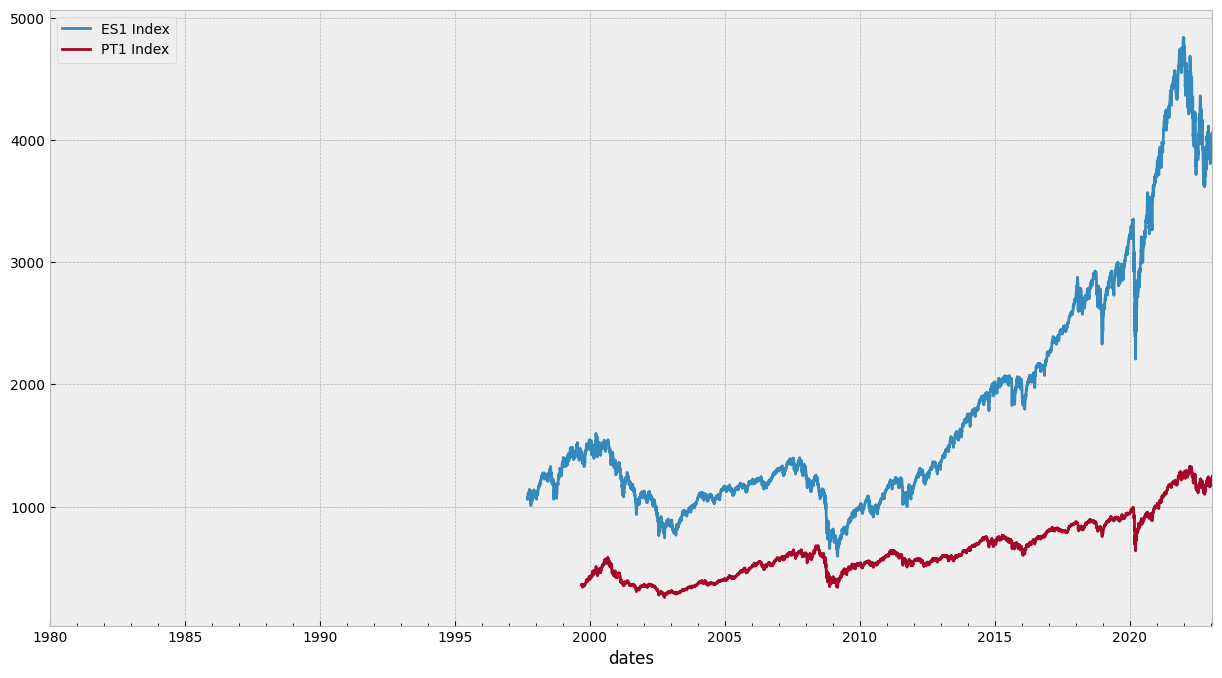

In [6]:
asset_prices[["ES1 Index", "PT1 Index"]].plot()

<Axes: xlabel='dates'>

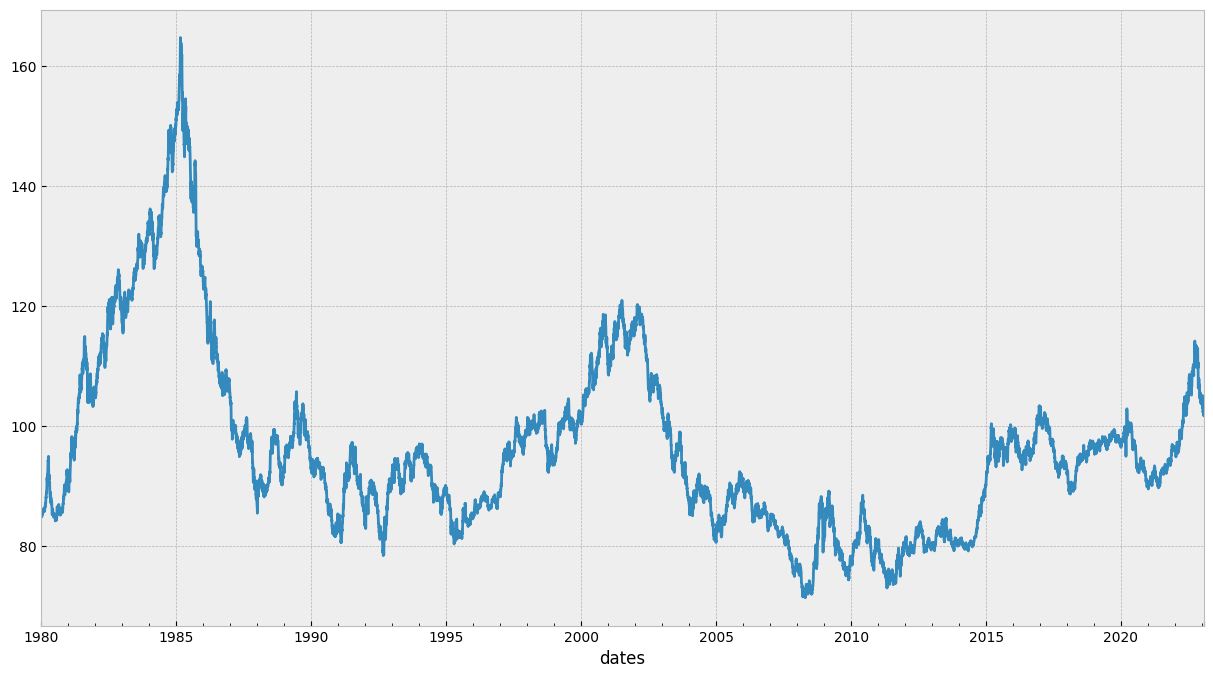

In [7]:
asset_prices["DXY Curncy"].plot()

<Axes: xlabel='dates'>

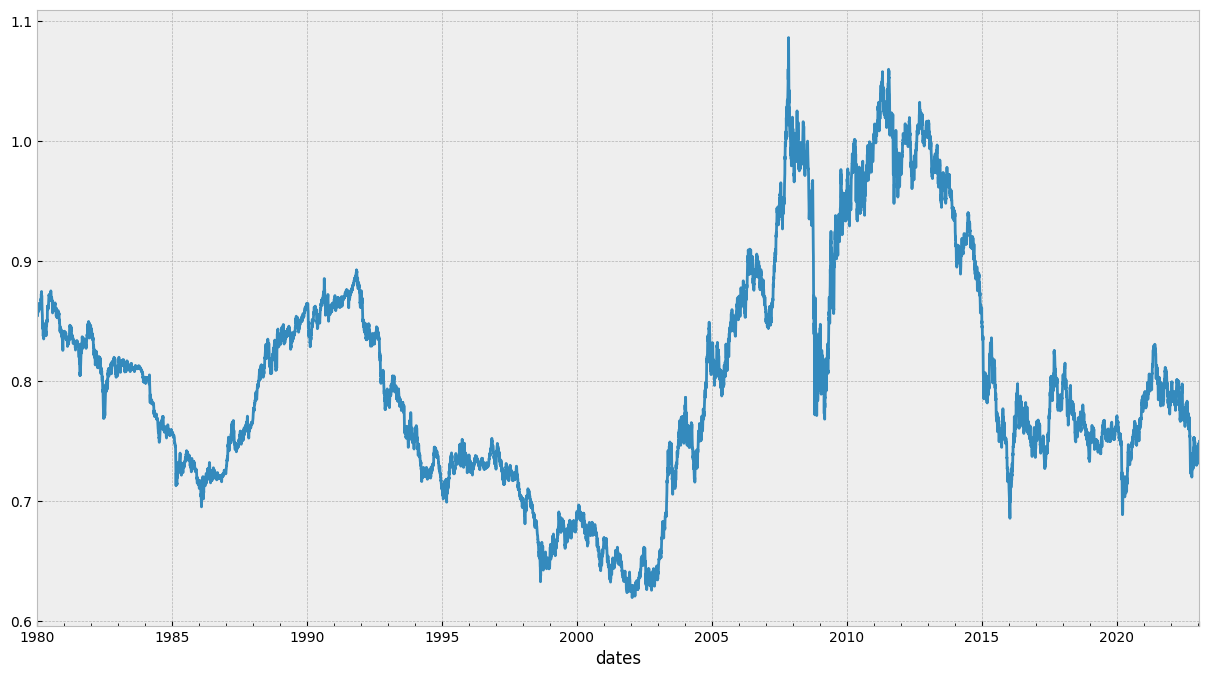

In [8]:
asset_prices["CADUSD Curncy"].plot()

In [9]:
economic_data

{'US': {'Unemployment':             actual_value  expected_value  number_of_forecaster  surprise
  dates                                                                   
  1997-02-07           5.4             5.3                   0.0      -0.1
  1997-03-07           5.3             5.3                   0.0      -0.0
  1997-04-04           5.2             5.2                   0.0      -0.0
  1997-05-02           4.9             5.2                   0.0       0.3
  1997-06-06           4.8             5.0                   0.0       0.2
  ...                  ...             ...                   ...       ...
  2022-05-06           3.6             3.5                  76.0      -0.1
  2022-06-03           3.6             3.5                  69.0      -0.1
  2022-07-08           3.6             3.6                  74.0      -0.0
  2022-08-05           3.5             3.6                  71.0       0.1
  2022-09-02           3.7             3.5                  71.0      -0.2
  


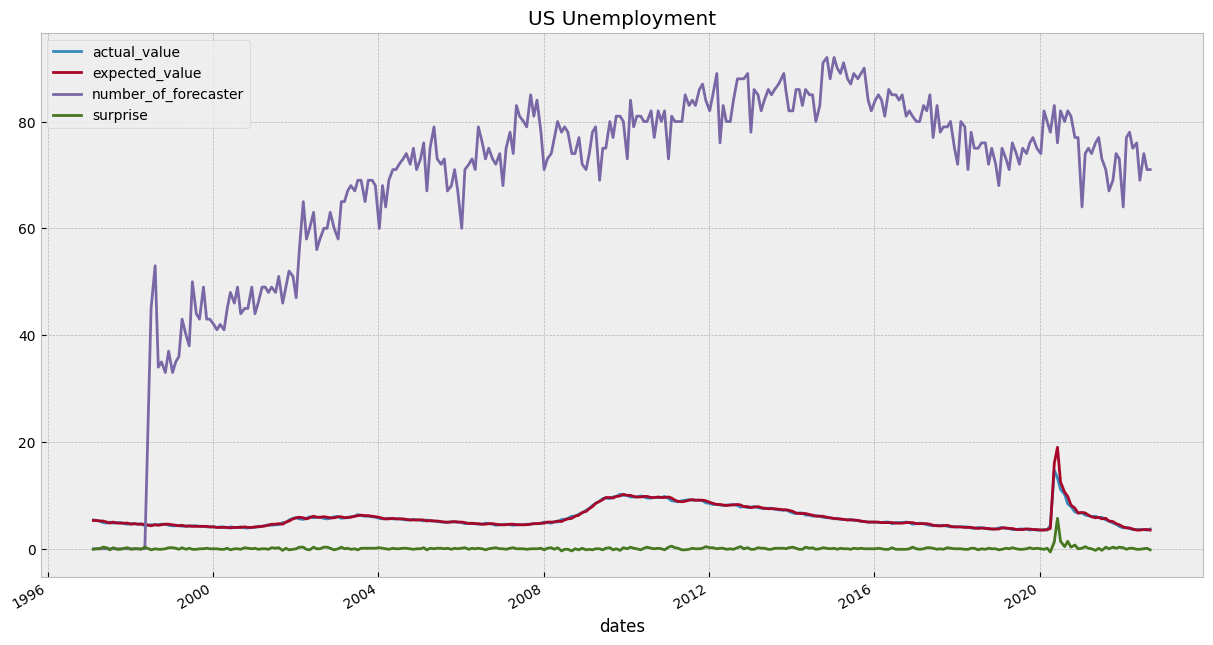

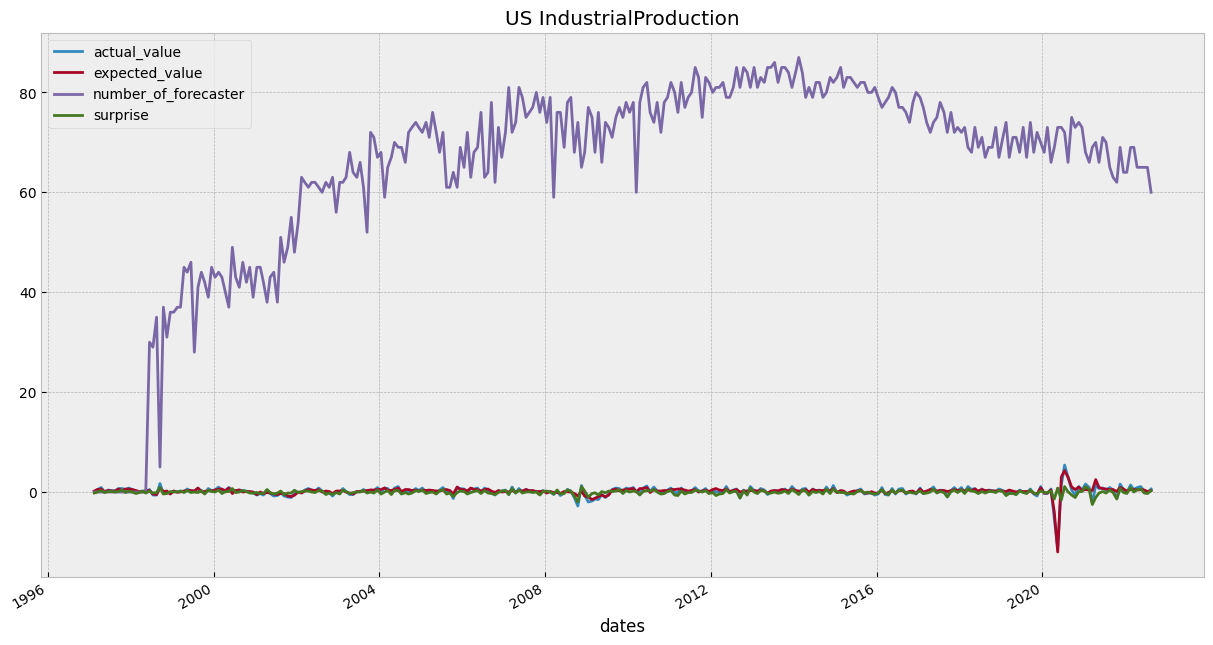

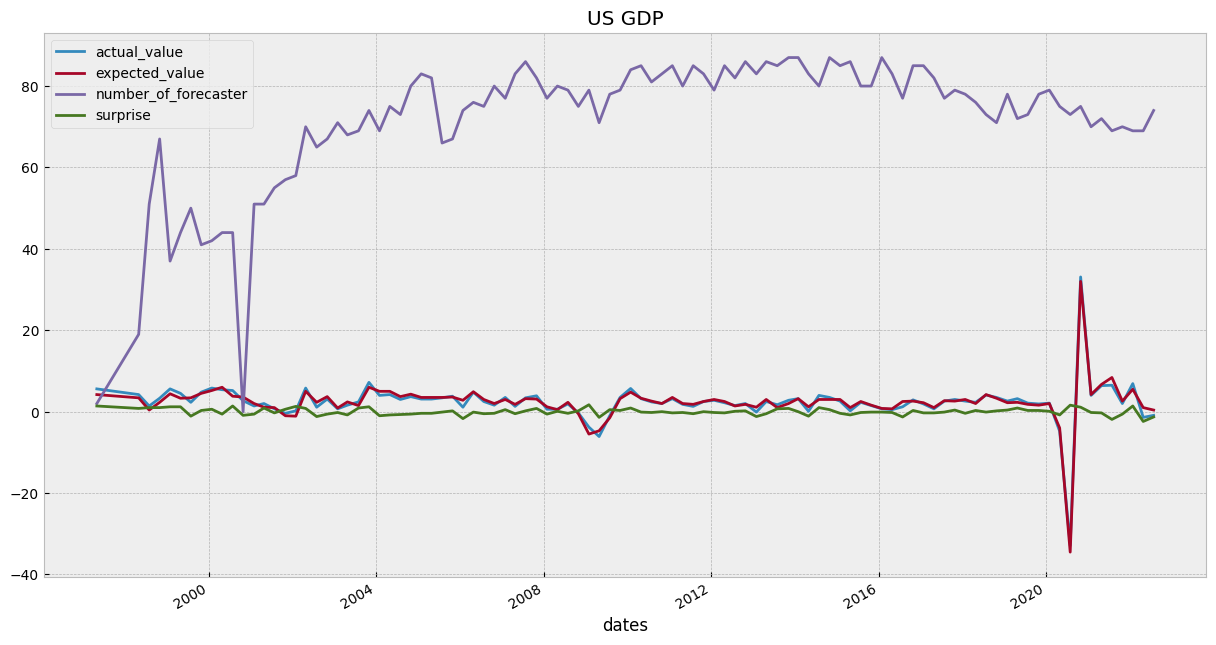

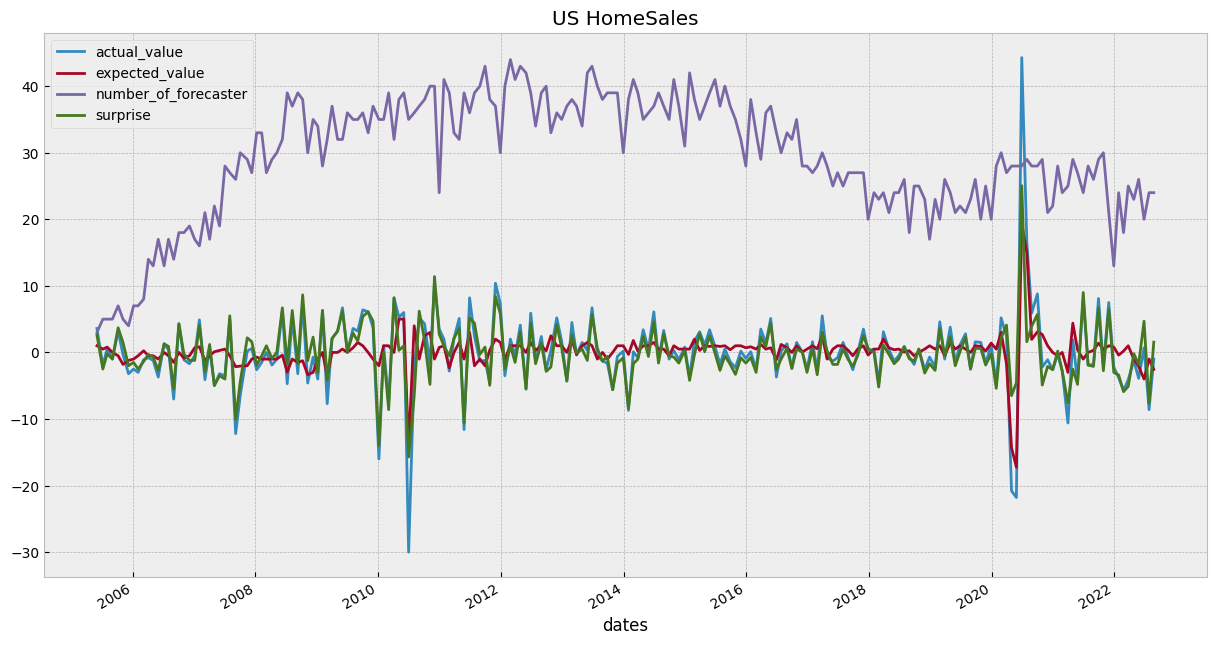

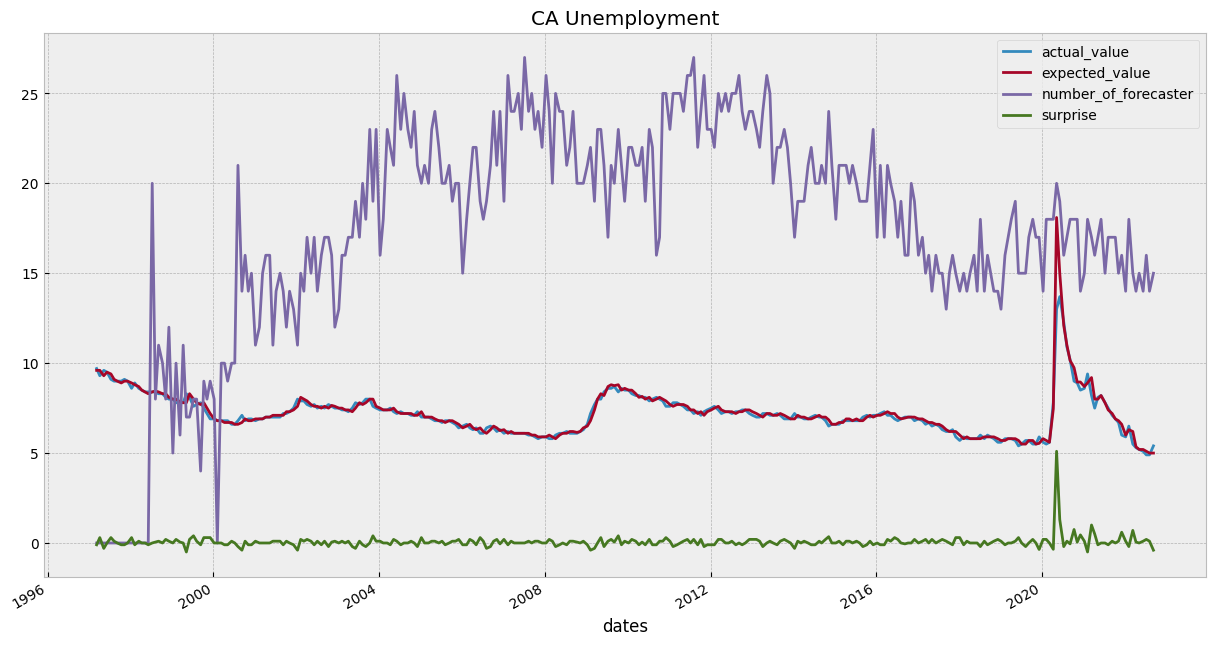

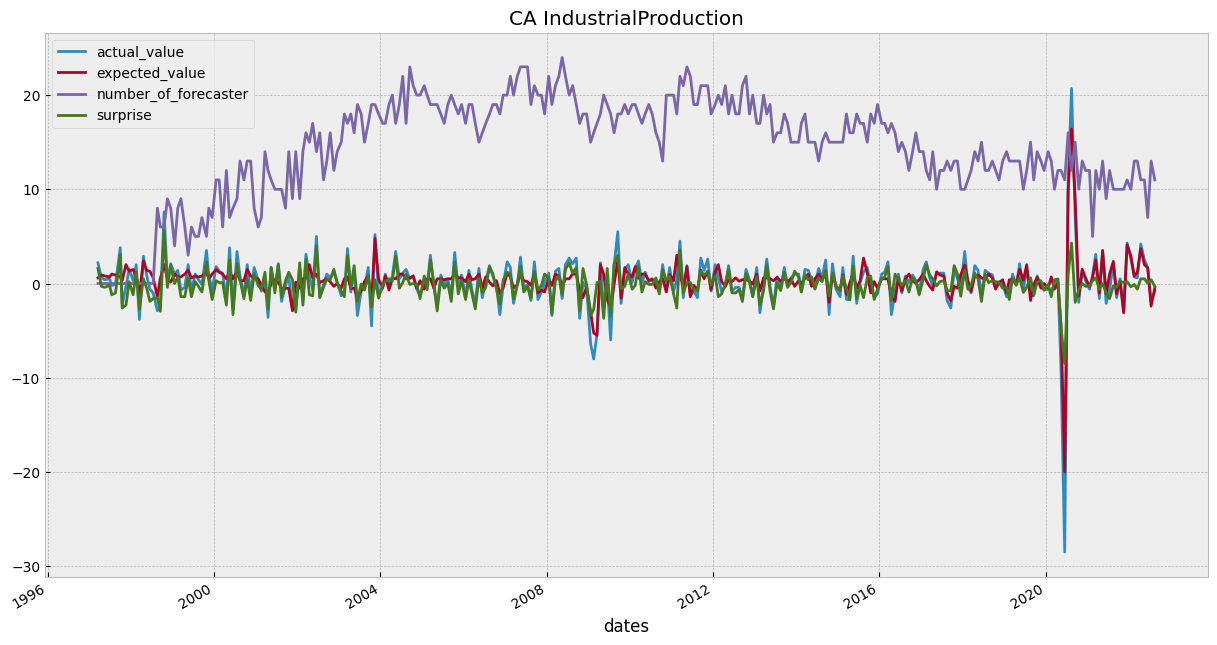

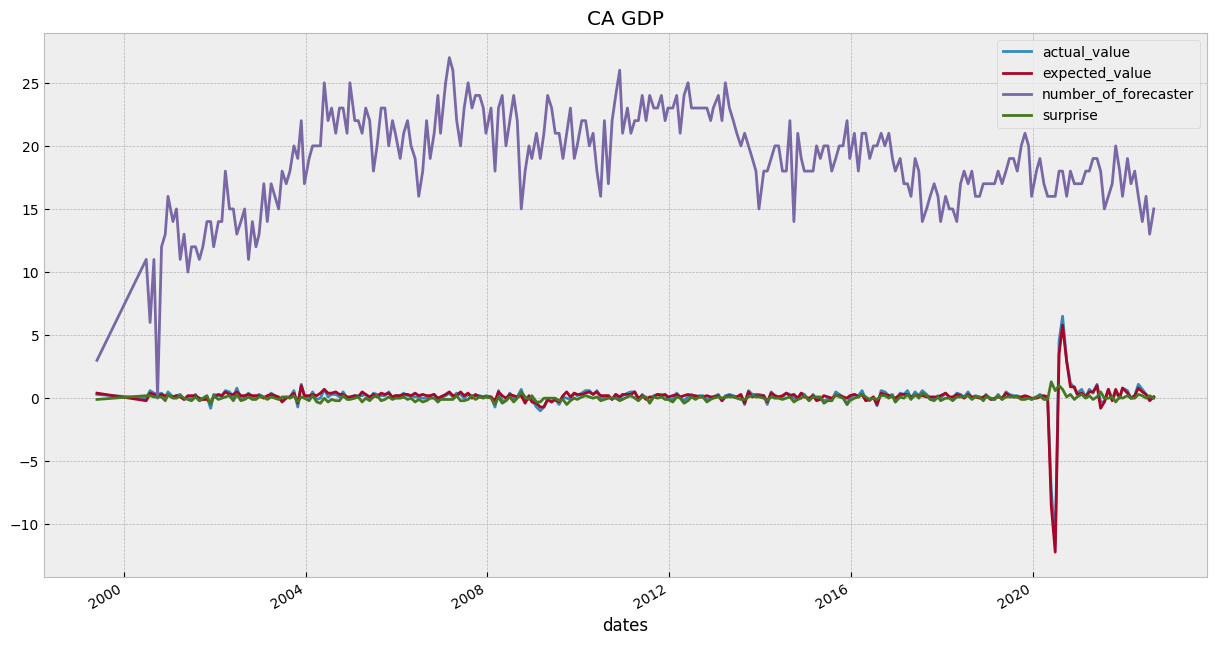

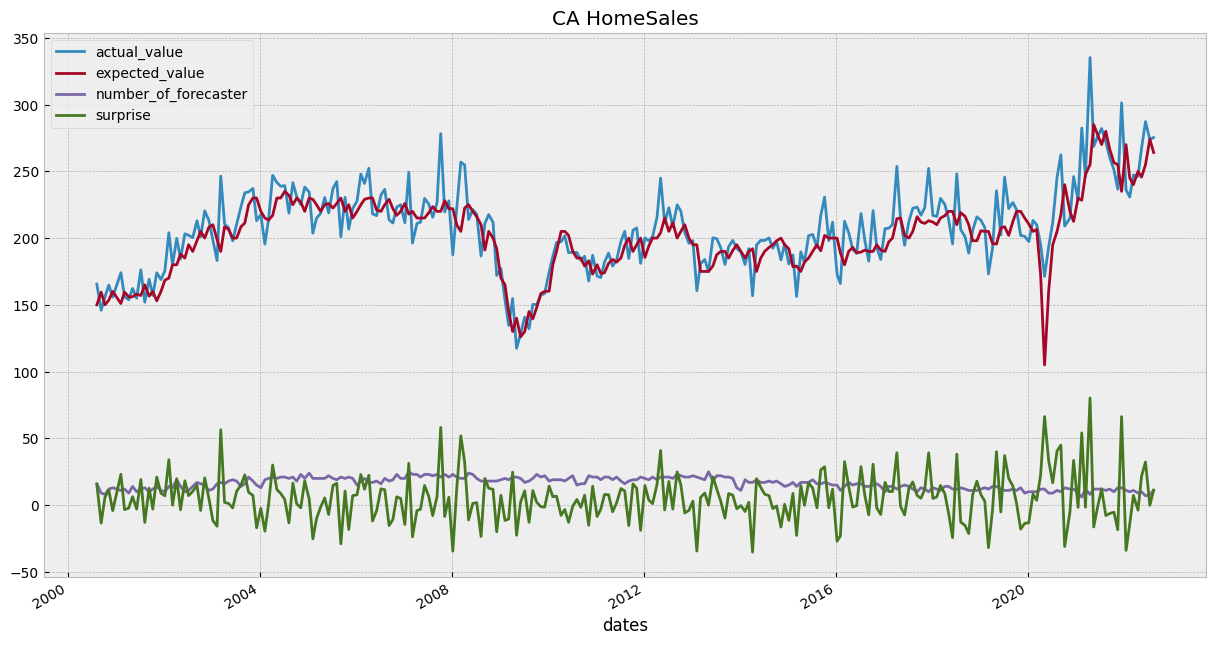

In [10]:
for country in countries:
    for label in data_labels:
        economic_data[country][label].plot(title=f"{country} {label}")

# Building An Indicator


In this example, we assume that the growth rate of GDP is a good indication of the growth of a country's economy. For illustrative and simplicity reasons, we will focus on only this data. With this assumption, again for simplicity, we propose our indicator as just the actual value of GDP growth rate.


In [11]:
us_gdp = economic_data["US"]["GDP"]["actual_value"]  # US GDP growth rate
ca_gdp = economic_data["CA"]["GDP"]["actual_value"]  # Canada GDP growth rate

gdp = pd.concat([us_gdp, ca_gdp], axis=1, sort=True, keys=["US", "CA"])

In [12]:
# our economic indicator is just the GDP growth rate
ca_indicator = ca_gdp
us_indicator = us_gdp

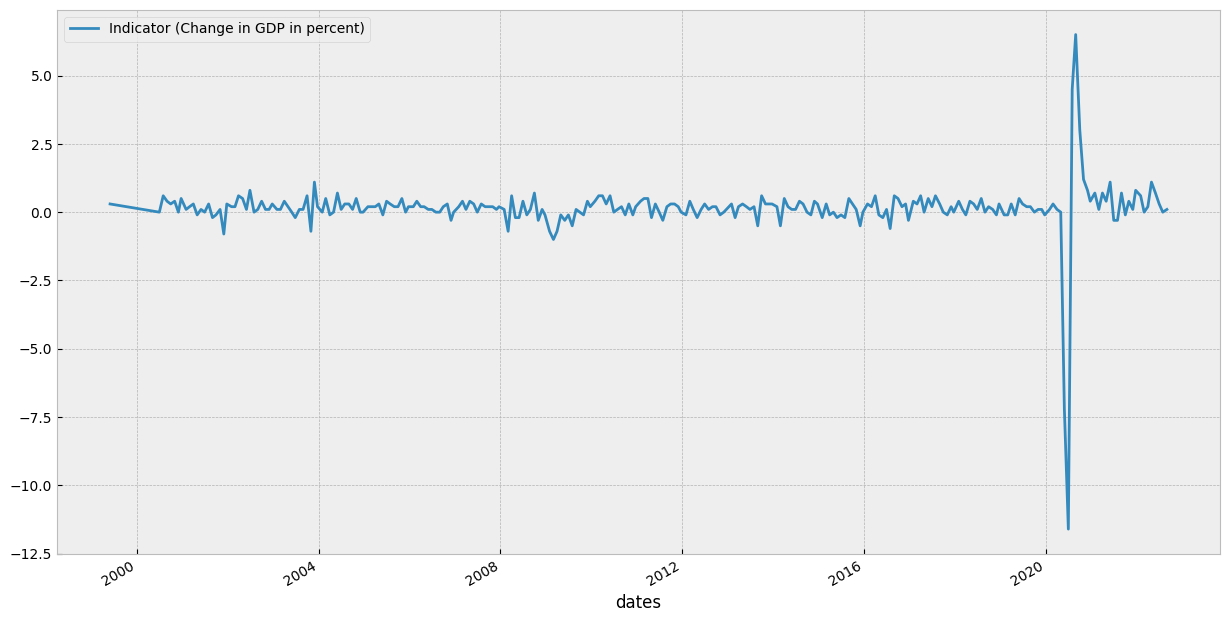

In [13]:
ca_indicator.plot(label="Indicator (Change in GDP in percent)")
plt.legend()

Step 1: Normalize the economic data so that the indicators are comparable


In [14]:
def normalize_economic_data(economic_data):
    """
    Normalize the economic data for each country.

    Parameters:
    economic_data (dict): A dictionary containing economic data for different countries.

    Returns:
    dict: The normalized economic data for each country.
    """

    economic_data_normalized = {"US": {}, "CA": {}}
    for country in economic_data:
        for label in economic_data[country]:
            df = economic_data[country][label]
            economic_data_normalized[country][label] = pd.DataFrame(
                preprocessing.normalize(economic_data[country][label], axis=0),
                index=df.index,
                columns=df.columns,
            )

    return economic_data_normalized


economic_data_normalized = normalize_economic_data(economic_data)

In [15]:
economic_data_normalized

{'US': {'Unemployment':             actual_value  expected_value  number_of_forecaster  surprise
  dates                                                                   
  1997-02-07      0.050955        0.049125              0.000000 -0.014794
  1997-03-07      0.050012        0.049125              0.000000 -0.000000
  1997-04-04      0.049068        0.048198              0.000000 -0.000000
  1997-05-02      0.046237        0.048198              0.000000  0.044382
  1997-06-06      0.045293        0.046345              0.000000  0.029588
  ...                  ...             ...                   ...       ...
  2022-05-06      0.033970        0.032441              0.060690 -0.014794
  2022-06-03      0.033970        0.032441              0.055100 -0.014794
  2022-07-08      0.033970        0.033368              0.059093 -0.000000
  2022-08-05      0.033026        0.033368              0.056697  0.014794
  2022-09-02      0.034914        0.032441              0.056697 -0.029588
  


In [16]:
# convert monthly index to daily for each country and indicator

for country in economic_data_normalized:
    for label in economic_data_normalized[country]:
        economic_data_normalized[country][label] = (
            economic_data_normalized[country][label].resample("D").ffill()
        )

In [17]:
# correlation among the actual values of the economic indicators for each country

df = pd.DataFrame(
    [
        economic_data_normalized["CA"]["Unemployment"]["actual_value"],
        economic_data_normalized["CA"]["IndustrialProduction"]["actual_value"],
        economic_data_normalized["CA"]["GDP"]["actual_value"],
        economic_data_normalized["CA"]["HomeSales"]["actual_value"],
    ]
).T
df.columns = ["Unemployment", "IndustrialProduction", "GDP", "HomeSales"]
df

df.corr()

,Unemployment,IndustrialProduction,GDP,HomeSales
Unemployment,1.000000,-0.088251,-0.236018,-0.221143
IndustrialProduction,-0.088251,1.000000,0.546209,0.162440
GDP,-0.236018,0.546209,1.000000,0.142429
HomeSales,-0.221143,0.162440,0.142429,1.000000


Indicator 1: Composite index of 4 indicators above. This index is the equal weighted average of the 4 economic indicators (Unemployment, GDP, Industrial Production, Home Sales). Unemployment is inverted because it's inversely correlated to the health of the economy.


In [42]:
# create a composite economic indicator for each country
# the composite indicator is the average of the normalized economic indicators
ca_composite_indicator = (
    (economic_data_normalized["CA"]["Unemployment"]["actual_value"])
    + (economic_data_normalized["CA"]["GDP"]["actual_value"])
    + (economic_data_normalized["CA"]["IndustrialProduction"]["actual_value"])
    + (economic_data_normalized["CA"]["HomeSales"]["actual_value"]) / 4
)
us_composite_indicator = (
    (economic_data_normalized["US"]["Unemployment"]["actual_value"])
    + (economic_data_normalized["US"]["GDP"]["actual_value"])
    + (economic_data_normalized["US"]["IndustrialProduction"]["actual_value"])
    + (economic_data_normalized["US"]["HomeSales"]["actual_value"]) / 4
)
ca_composite_indicator

dates
1997-03-07   NaN
1997-03-08   NaN
1997-03-09   NaN
1997-03-10   NaN
1997-03-11   NaN
              ..
2022-09-05   NaN
2022-09-06   NaN
2022-09-07   NaN
2022-09-08   NaN
2022-09-09   NaN
Freq: D, Name: actual_value, Length: 9318, dtype: float64

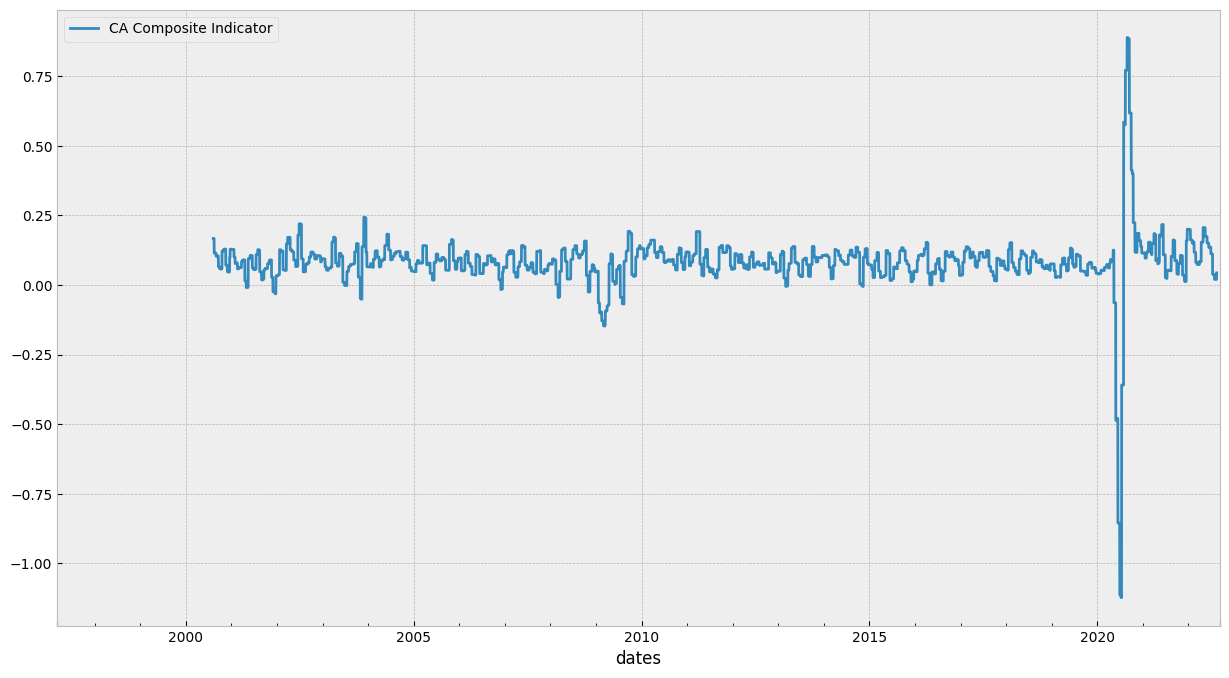

In [43]:
ca_composite_indicator.plot(label="CA Composite Indicator")
plt.legend()

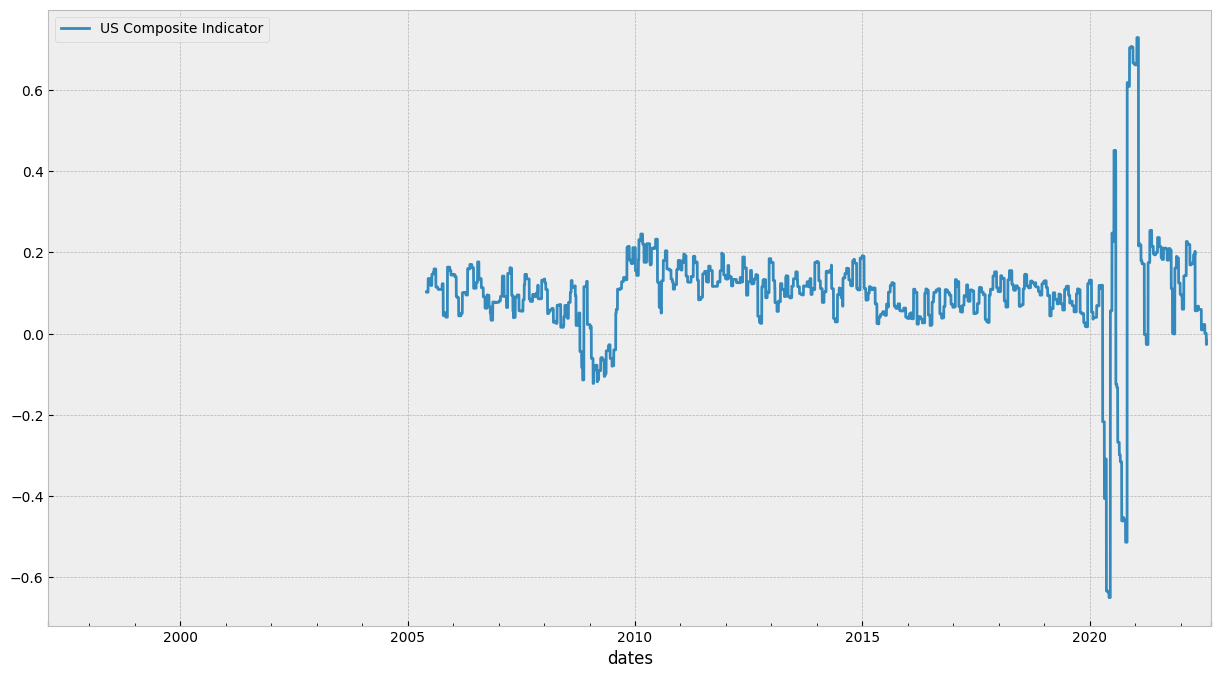

In [44]:
us_composite_indicator.plot(label="US Composite Indicator")
plt.legend()

Indicator 2: A surprise index that measures the difference between the actual value of the economic indicator and the consensus forecast. This index is the equal weighted average of the 4 surprise indices.


In [45]:
# Indicator 2: A surprise index that measures the difference between the actual value of the economic indicator and the consensus forecast. This index is the equal weighted average of the 4 surprise indices.

ca_surprise = (
    economic_data_normalized["CA"]["Unemployment"]["surprise"]
    + economic_data_normalized["CA"]["GDP"]["surprise"]
    + economic_data_normalized["CA"]["IndustrialProduction"]["surprise"]
    + economic_data_normalized["CA"]["HomeSales"]["surprise"]
) / 4
us_surprise = (
    economic_data_normalized["US"]["Unemployment"]["surprise"]
    + economic_data_normalized["US"]["GDP"]["surprise"]
    + economic_data_normalized["US"]["IndustrialProduction"]["surprise"]
    + economic_data_normalized["US"]["HomeSales"]["surprise"]
) / 4

ca_surprise

dates
1997-03-07   NaN
1997-03-08   NaN
1997-03-09   NaN
1997-03-10   NaN
1997-03-11   NaN
              ..
2022-09-05   NaN
2022-09-06   NaN
2022-09-07   NaN
2022-09-08   NaN
2022-09-09   NaN
Freq: D, Name: surprise, Length: 9318, dtype: float64

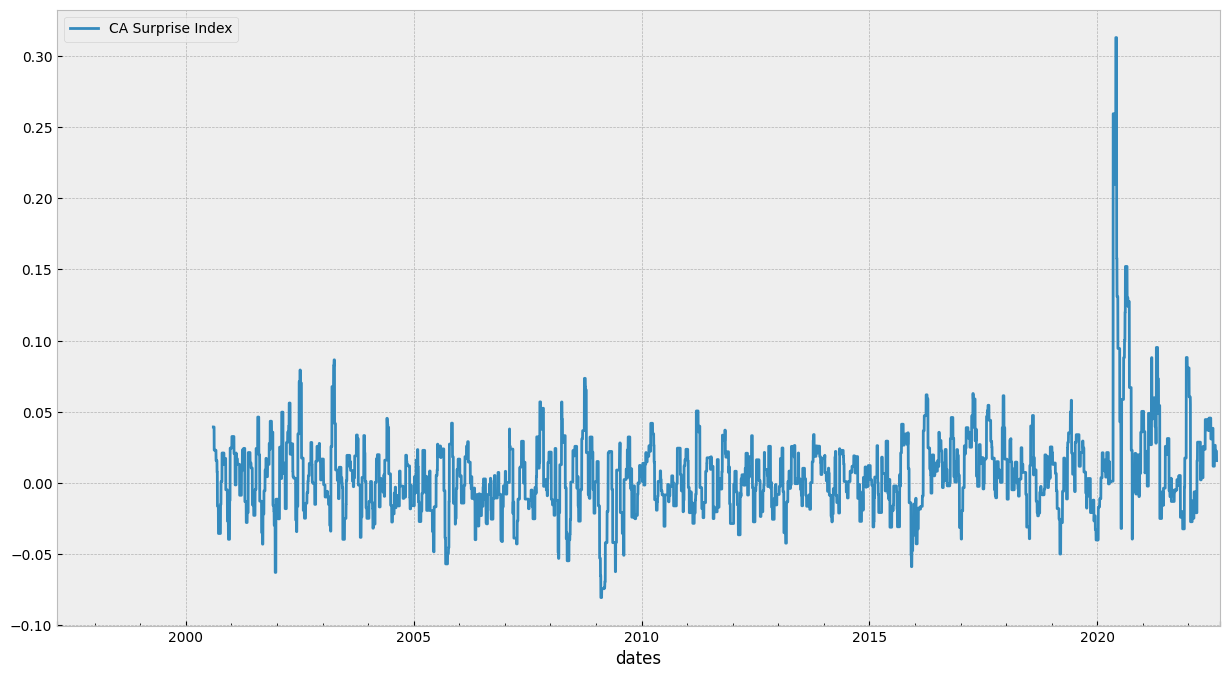

In [46]:
ca_surprise.plot(label="CA Surprise Index")
plt.legend()

dates
1997-02-07   NaN
1997-02-08   NaN
1997-02-09   NaN
1997-02-10   NaN
1997-02-11   NaN
              ..
2022-08-29   NaN
2022-08-30   NaN
2022-08-31   NaN
2022-09-01   NaN
2022-09-02   NaN
Freq: D, Name: surprise, Length: 9339, dtype: float64

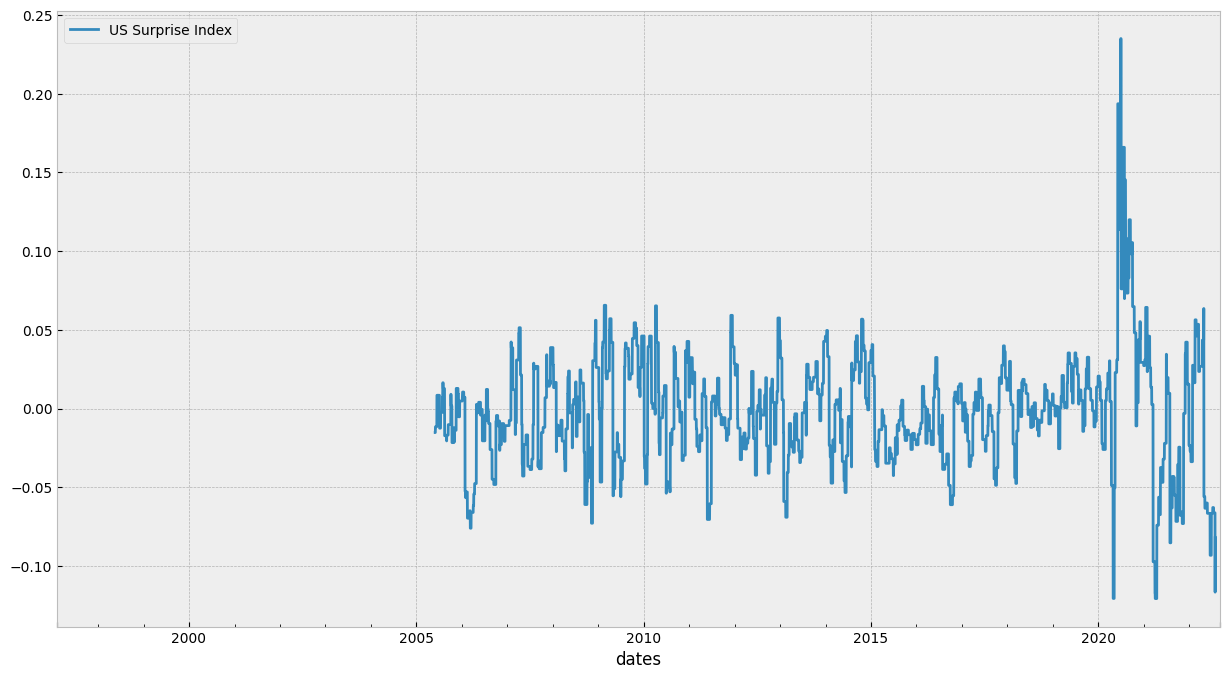

In [47]:
us_surprise.plot(label="US Surprise Index")
plt.legend()
us_surprise

# Building a Trading Signal Using the Indicator


Using the indicator that we have created, we then try to create a trading signal.

We start by thinking how we can trade this strategy.

The most simplistic use of the indicator to trade would be using the indicator as the trading signal without any transformation. In our example, that would mean buy (go long) when the change in GDP is positive, and sell (go short) when the change in GDP is negative. This approach is shown in basic_signal() below.

We encourage you to try some new signals. As an example of how a signal might look like, you can look at the momentum trading signal in the Software Engineering project (Project 1).


In [48]:
def calculate_baseline_signal(asset_prices: pd.DataFrame):
    # calculate the signal for the baseline indicator. The signal is always 1. This means that we always take a long position in the asset.
    signal = pd.DataFrame(
        np.zeros((len(asset_prices.index), 1)),
        index=asset_prices.index,
        columns=["signal"],
    )
    signal["signal"] = 1

    return signal


def calculate_composite_signal(indicator: pd.Series):
    # calculate the signal for the composite indicator. If the indicator is positive, the signal is 1. If the indicator is negative, the signal is -1.
    signal = pd.DataFrame(
        np.zeros((len(indicator.index), 1)),
        index=indicator.index,
        columns=["signal"],
    )
    signal[indicator > 0] = 1
    signal[indicator < 0] = -1

    return signal


def calculate_surprise_signal(indicator: pd.Series):
    # calculate the signal for the surprise index. If the surprise index is positive, the signal is 1. If the surprise index is negative, the signal is -1.
    signal = pd.DataFrame(
        np.zeros((len(indicator.index), 1)),
        index=indicator.index,
        columns=["signal"],
    )
    signal[indicator > 0] = 1
    signal[indicator < 0] = -1

    return signal

In [49]:
ca_baseline_signal = calculate_baseline_signal(asset_prices)
us_baseline_signal = calculate_baseline_signal(asset_prices)

ca_composite_indicator_signal = calculate_composite_signal(ca_composite_indicator)
us_composite_indicator_signal = calculate_composite_signal(us_composite_indicator)

ca_surprise_signal = calculate_surprise_signal(ca_surprise)
us_surprise_signal = calculate_surprise_signal(us_surprise)

## Show Performance of the Trading Signal


### Choose the assets you want to trade


In [61]:
# In this case, we are postulating that when the change in GDP is positive,
# both the country's stock market and the country's currency will rise.
ca_assets = ["PT1 Index"]
us_assets = ["ES1 Index"]

### Calculate PnL


In [62]:
def calculate_pnl(ret, pos):
    # function to calculate profit and loss
    # we trade at the end of the period, and take profit & loss on the market move next period on our position
    # that's why we are shifting positon vector by one
    return ret.multiply(pos.shift(), axis=0).dropna()

In [63]:
# build the return series for each of the series
ca_returns = asset_prices[ca_assets].pct_change()
us_returns = asset_prices[us_assets].pct_change()

# Resample the Signal into daily signal for composite and surprise indicator


ca_daily_baseline_pos = ca_baseline_signal.resample("D").ffill()
us_daily_baseline_pos = us_baseline_signal.resample("D").ffill()

ca_composite_pos = ca_composite_indicator_signal.resample("D").ffill()
ca_composite_pos = us_composite_indicator_signal.resample("D").ffill()

ca_surprise_daily_pos = ca_surprise_signal.resample("D").ffill()
us_surprise_daily_pos = us_surprise_signal.resample("D").ffill()

In [64]:
ca_baseline_pnl = calculate_pnl(ca_returns, ca_daily_baseline_pos["signal"])
us_baseline_pnl = calculate_pnl(us_returns, us_daily_baseline_pos["signal"])


us_composite_pnl = calculate_pnl(us_returns, ca_composite_pos["signal"])
ca_composite_pnl = calculate_pnl(ca_returns, ca_composite_pos["signal"])


us_surprise_pnl = calculate_pnl(us_returns, us_surprise_daily_pos["signal"])
ca_surprise_pnl = calculate_pnl(ca_returns, us_surprise_daily_pos["signal"])

<Axes: xlabel='dates'>

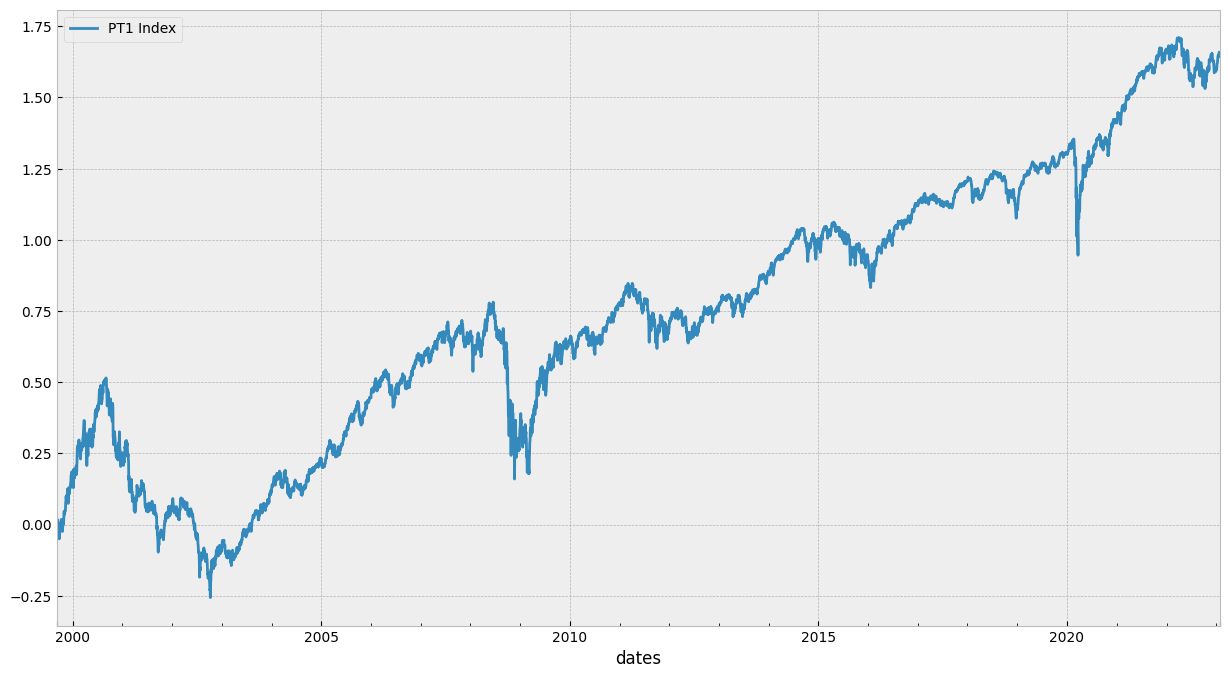

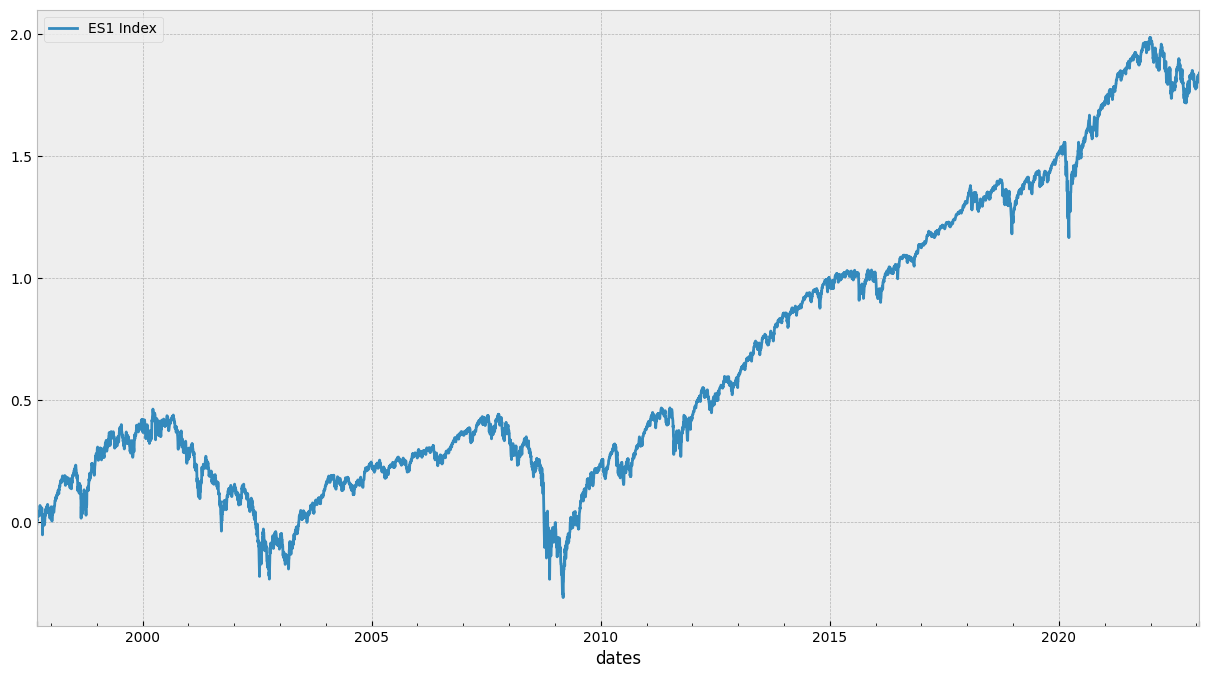

In [65]:
ca_baseline_pnl.cumsum().plot(label="CA Baseline PnL")

us_baseline_pnl.cumsum().plot(label="US Baseline PnL")

<Axes: title={'center': 'Cumulative Trading Profit'}, xlabel='dates'>

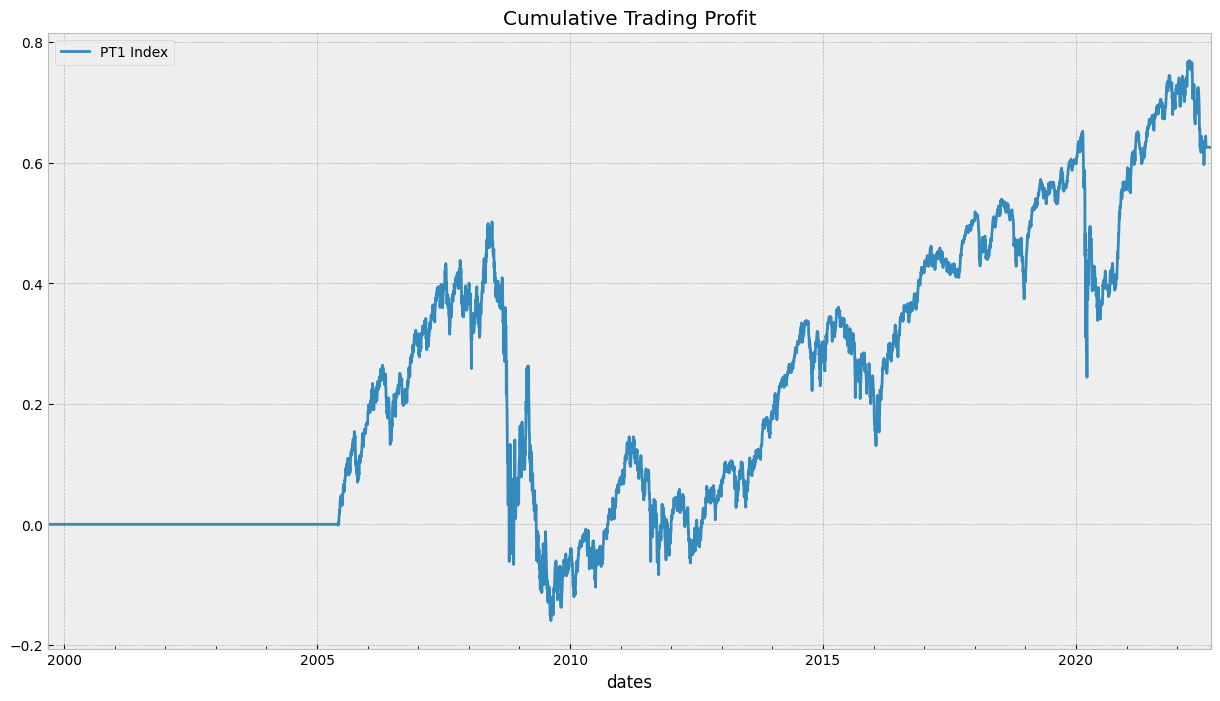

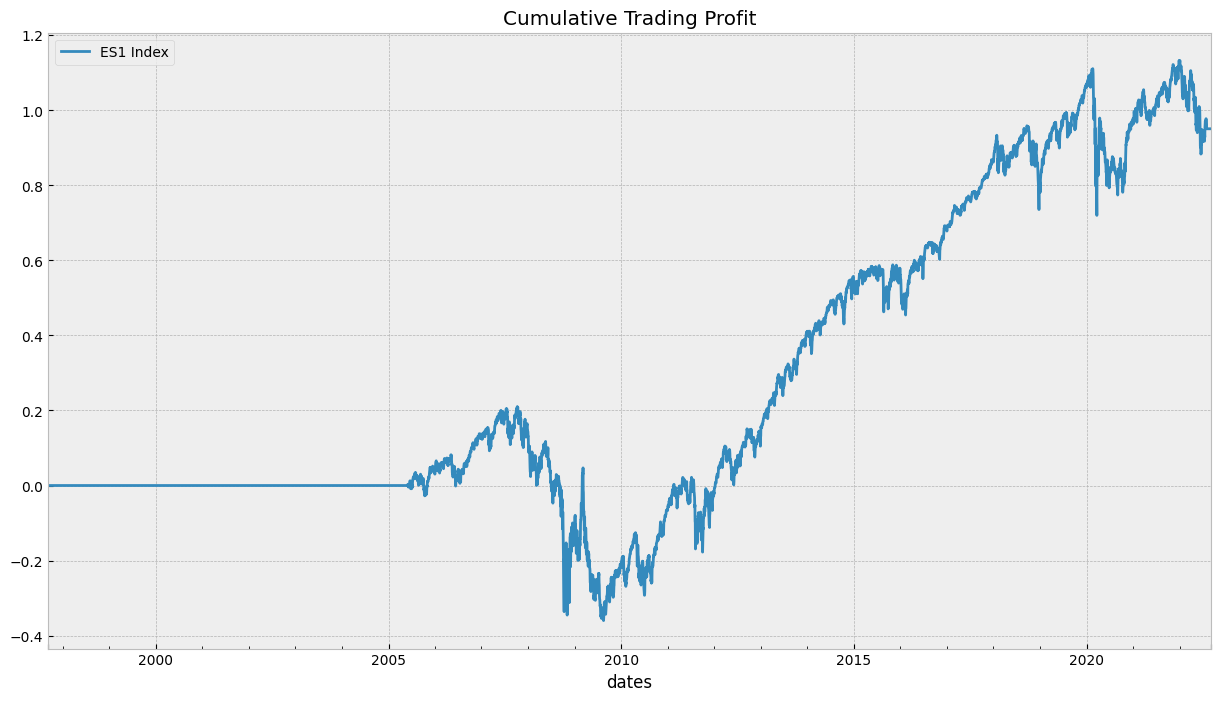

In [66]:
ca_composite_pnl.cumsum().plot(title="Cumulative Trading Profit")

us_composite_pnl.cumsum().plot(title="Cumulative Trading Profit")

<Axes: title={'center': 'Cumulative Trading Profit'}, xlabel='dates'>

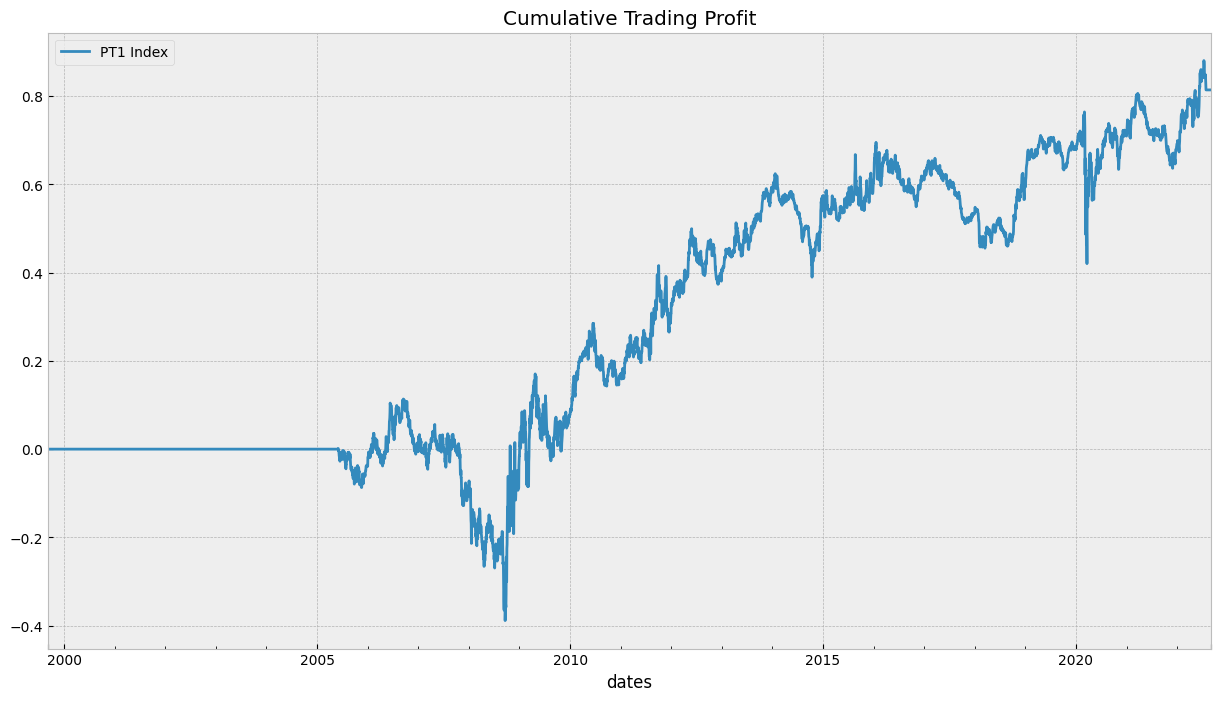

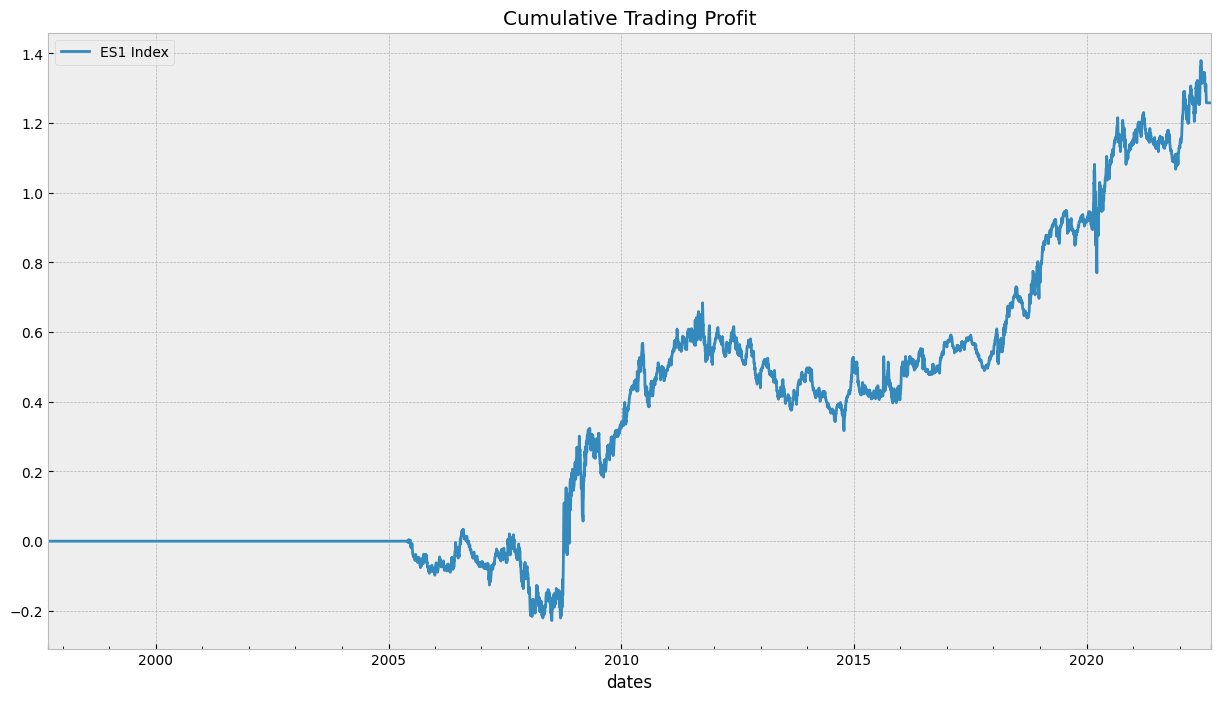

In [67]:
ca_surprise_pnl.cumsum().plot(title="Cumulative Trading Profit")

us_surprise_pnl.cumsum().plot(title="Cumulative Trading Profit")

## Some thoughts on the performance of the trading signal


Please examine the results of your trading signal and provide some commentary on the performance.

If it performs well. Why? If it doesn't, why not? How can you make it better?

What would be the next steps, if on the job, you are asked to further explore this investigation?


In [68]:
ca_baseline_sharpe_ratio = ca_baseline_pnl.mean() / ca_baseline_pnl.std()
ca_baseline_sharpe_ratio

PT1 Index    0.023438
dtype: float64

In [69]:
us_baseline_share_ratio = us_baseline_pnl.mean() / us_baseline_pnl.std()
us_baseline_share_ratio

ES1 Index    0.022532
dtype: float64

In [70]:
ca_surprise_pnl.mean() / ca_surprise_pnl.std()

PT1 Index    0.013513
dtype: float64

In [71]:
us_surprise_pnl.mean() / us_surprise_pnl.std()

ES1 Index    0.019033
dtype: float64